#### Discretisation using k-means clustering 

In this notebook, we are going to apply k-means clustering to discretise the continuous variable. The k-means clustering is as follows:

- Initialize the random K centers
- Each data point is associated with the closest center
- Each center position is re-computed as the center of its associated points

Steps 2 and 3 are repeated until convergence is reached. The algorithm minimises the pairwise squared deviations of points within the same cluster.

Note that the user, needs to define the number of clusters, as with equal width and equal frequency discretisation.

A good example of k-means [here](https://towardsdatascience.com/how-does-k-means-clustering-in-machine-learning-work-fdaaaf5acfa0)

Datasets: Titanic 


In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer

In [28]:
use_columns = ['age', 'fare', 'survived']

data = pd.read_csv("../datasets/titanic.csv", usecols=use_columns)
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [29]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0
)


In [30]:
X_test.fare.isnull().sum()

1

In [31]:
# Lets create a function that imputes missing values from random values

def impute_random(data, variable):
    df = data.copy()
    
    df[variable+'_random'] = df[variable]

    # random sampling 
    random_sampling = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0
    )
    # pandas needs to have the same index in order to merge datasets 
    random_sampling.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+"_random"] = random_sampling

    return df[variable+"_random"]

In [36]:
# replace NA in both train and test sets

X_train['age'] = impute_random(X_train, 'age')
X_test['age'] = impute_random(X_test, 'age')

X_train['fare'] = impute_random(X_train, 'fare')
X_test['fare'] = impute_random(X_test, 'fare')

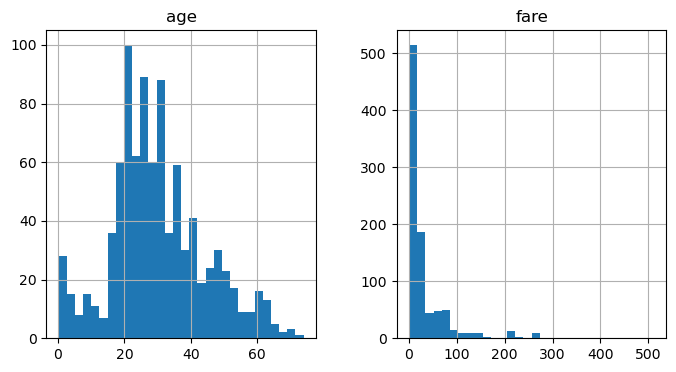

In [37]:
# let's explore the distribution of age
X_train[['age', 'fare']].hist(bins=30, figsize=(8,4))
plt.show()

**K-Means discretisation with Scikit-learn**

In [38]:
disc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
disc.fit(X_train[['age', 'fare']])

C:\Users\cssar\miniconda3\envs\whiskey_pt\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\cssar\miniconda3\envs\whiskey_pt\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='kmeans')

In [41]:
disc.bin_edges_

array([array([ 0.1667    , 19.35059866, 34.06303553, 50.22640292, 74.        ]),
       array([  0.        ,  48.38317511, 155.62486898, 371.03119259,
              512.3292    ])                                         ],
      dtype=object)

In [48]:
disc.n_bins_

array([4, 4])

In [42]:
train_t = disc.transform(X_train[['age', 'fare']])

train_t = pd.DataFrame(train_t, columns = ['age', 'fare'])

train_t.head()

,age,fare
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,2.0,0.0
4,1.0,0.0


In [43]:
test_t = disc.transform(X_test[['age', 'fare']])

test_t = pd.DataFrame(test_t, columns = ['age', 'fare'])

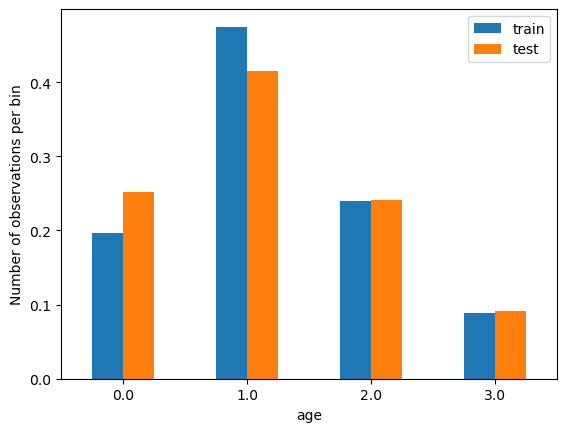

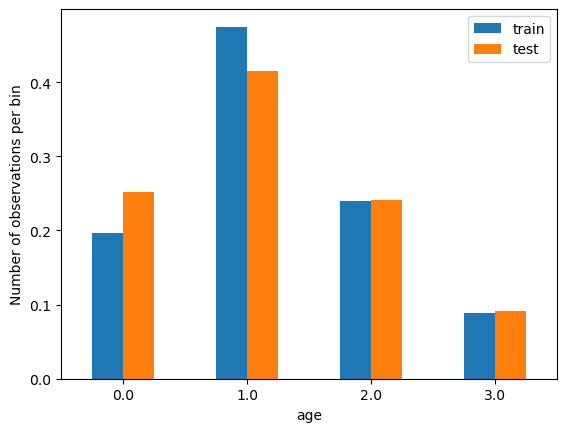

In [45]:
t1 = train_t.groupby(['age'])['age'].count() / len(train_t)
t2 = test_t.groupby(['age'])['age'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')
plt.show()

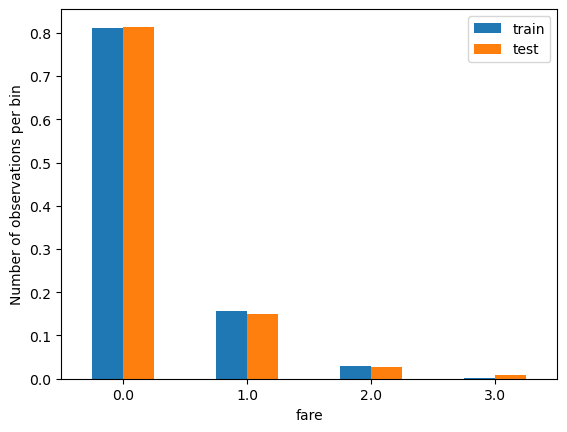

In [46]:
t1 = train_t.groupby(['fare'])['fare'].count() / len(train_t)
t2 = test_t.groupby(['fare'])['fare'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')
plt.show()